<figure>
   <IMG SRC="https://mamba-python.nl/images/logo_basis.png" WIDTH=125 ALIGN="right">
   
</figure>

# Common pitfalls

<br>




This notebook is created for the MAMBA Python course to explain the common pitfalls in using Python.

<div style="text-align: right"> developed by Onno Ebbens </div>

Table of content:<a class="anchor" id="0"></a>
1. [variable names](#1)
    1. [reusing variable names](#11)
    2. [built-in functions](#12)
2. [nested loops and statements](#2)
3. [copy-paste](#4)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

[back to TOC](#0)
## 1. variable names<a class="anchor" id="1"></a>

Naming your variables may sound trivial but is important for the readability of your code. Some naming conventions are written down in PEP-8. 

An example of a widely adopted naming convention is shown below. The convention is that variable and function names should be lowercase, with words separated by underscores as necessary to improve readability.

In [1]:
# according to conventions
list_of_animals = ['dog', 'cat', 'mouse', 'duck']

# not according to conventions
ListOfAnimals = ['dog','cat','mouse','duck']

### A. reusing variable names<a class="anchor" id="11"></a>

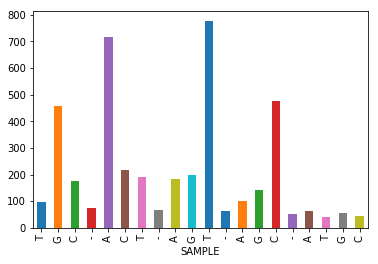

### B. built-in functions<a class="anchor" id="12"></a>

There are a number of built-in functions that are available without importing them via a package. These functions can be shown with the command below.

In [14]:
dir(__builtin__)

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIteration',
 'StopIter

If you use a built-in function as a variable name, you overwrite the built-in function and cannot use it anymore. You have to restart the kernel in order to retrieve the built-in function. See the two examples below. 

In [18]:
range = (1,100) #this overwrites the built-in function 'range'
range(10)       #now you cannot call this function anymore

TypeError: 'tuple' object is not callable

In [17]:
list = [1,2,3] #this overwrites the built-in function 'list'
a = (5,4,7)    #if you want to convert this tuple to a list you get an error
list(a)

TypeError: 'list' object is not callable

[back to TOC](#0)

## 2. loops<a class="anchor" id="2"></a>

loops are a very powerful tool but it can make code slow and hard to read. The common approach is to avoid loops, especially nested loops, if possible. Consider the code below in which an image of a ship is blurred by taking the average gray value of a 10x10 pixel patch.

source: https://realpython.com/numpy-array-programming/

In [54]:
import os 
for i in os.listdir(r'C:\Users\onno__000\Documents\04_mamba\02_google_drive\Python Cursus\cursusmaterial\presentaties_ongecontroleerd\PAOTM-4 dagen'):
    print(i)

bestanden_presentaties
d1 p1 start_presentatie.pptx
d1 p2 Toepassingen van Python.pptx
d1 p3 theorie_1.pptx
d1 p4 eigen toepassing.pptx
d1 p5 einde cursusdag 1.pptx
d2 p1 optarten en terugkoppeling eigen toepassing - kopie - kopie.pptx
d2 p2 toepassing Python geotechniek.pptx
d2 p3 theorie_2 - datatypes.pptx
d2 p4 ondersteuning via internet.pptx
d2 p5 einde cursusdag 2.pptx
d3 p1opstarten en terugkoppeling eigen toepassing.pptx
d3 p2 toepassing Python data-analyse whatsapp.pptx
d3 p3 theorie_3 - kwaliteit code.pptx
d3 p4 samen programmeren.potx
d3 p5 einde cursusdag 3.pptx
d4 p1 optarten en terugkoppeling eigen toepassing - kopie.pptx
d4 p2 toepassing Python databases.pptx
d4 p3 theorie_4 - functioneel-oop.pptx
d4 p4 eigen toepassing presenteren uitleg.pptx
d4 p5 einde cursus.pptx
desktop.ini
~$d1 p1 start_presentatie.pptx
~$d3 p2 toepassing Python data-analyse whatsapp.pptx
~$d3 p3 theorie_3 - kwaliteit code.pptx


In [45]:
df = pd.read_csv(r'..\..\..\Practical_examples\whatsapp data\data\_chat_df.csv', index_col=0)
df.index = pd.to_datetime(df.index)

In [49]:
df['hour'] = 0
for index, row in df.iterrows():
    df[index]['hour'] = index.hour

KeyError: Timestamp('2018-03-22 12:18:07')

In [44]:
index

'2018-03-22 12:18:07'

In [38]:
for row in df.iloc[:]:
    print(row)

Unnamed: 0
user
message


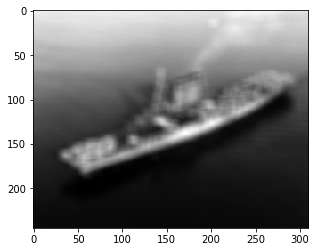

In [6]:
# using a nested for loop
m, n = img.shape
mm, nn = m - size + 1, n - size + 1

patch_means = np.empty((mm, nn))
for i in range(mm):
    for j in range(nn):
        patch_means[i, j] = img[i: i+size, j: j+size].mean()

fig, ax = plt.subplots()
ax.imshow(patch_means, cmap='gray')
ax.grid(False)

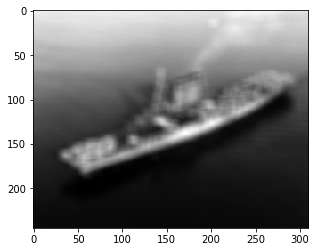

In [26]:
shape = (img.shape[0] - size + 1, img.shape[1] - size + 1, size, size)
patches = stride_tricks.as_strided(img, shape=shape, strides=img.strides*2)
veclen = 10**2
patches.reshape(*patches.shape[:2], veclen).mean(axis=-1).shape
strided_means = patches.mean(axis=(-1, -2))

fig, ax = plt.subplots()
ax.imshow(strided_means, cmap='gray')
ax.grid(False)

[back to TOC](#0)

## 3. copy-paste <a class="anchor" id="3"></a>

copy and paste is both a blessing and a curse for programming. It may look obvious to copy-paste a piece of code if you need it again. However this may turn out to be very time consuming in the end.

In [19]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })

TypeError: 'tuple' object is not callable

[back to TOC](#0)

## 4. <a class="anchor" id="4"></a>